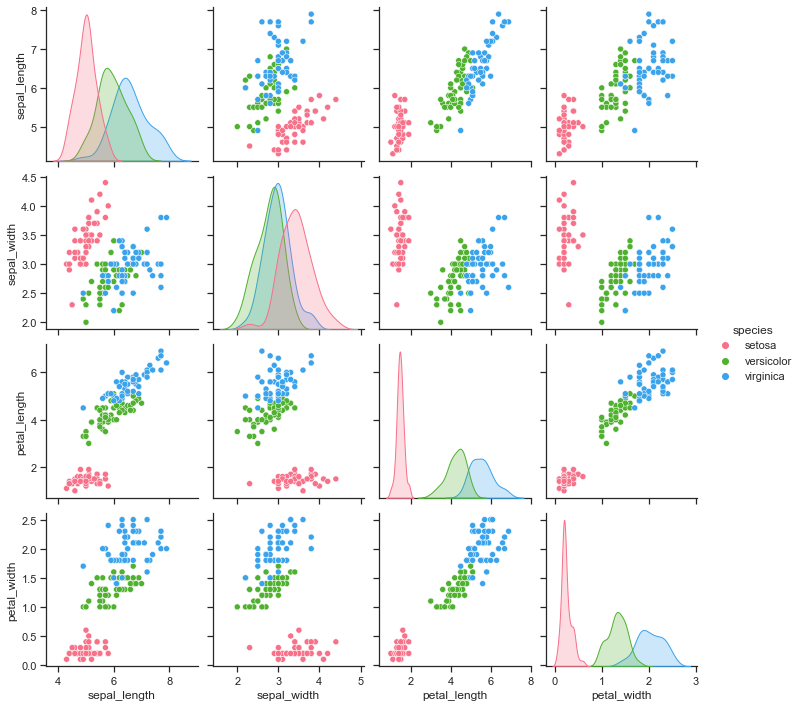

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style = 'ticks', color_codes = True)
iris = sns.load_dataset('iris')
g = sns.pairplot(iris, hue = 'species', palette = 'husl')

In [2]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder

# Features
X = iris.iloc[:, 0:4].values
# Label
y = iris.iloc[:, 4].values

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

# 입력 Node 4개, 출력 Node 64개
model.add(Dense(64, input_shape = (4, ), activation='relu'))
model.add(Dense(64, activation='relu'))
# softmax: 확률값을 이용한 다양한 클래스 분류에 적합
model.add(Dense(3, activation = 'softmax'))

# categorical_crossentropy: 다항 분류에 적합
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [7]:
hist = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
4/4 [==============================] - 9s 129ms/step - loss: 1.0141 - accuracy: 0.3446 - val_loss: 0.9953 - val_accuracy: 0.5333
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.8603 - accuracy: 0.6733 - val_loss: 0.8437 - val_accuracy: 0.6000
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7844 - accuracy: 0.7927 - val_loss: 0.7507 - val_accuracy: 0.7333
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7130 - accuracy: 0.8794 - val_loss: 0.7163 - val_accuracy: 0.6000
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6551 - accuracy: 0.7123 - val_loss: 0.6780 - val_accuracy: 0.6000
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6192 - accuracy: 0.6948 - val_loss: 0.6278 - val_accuracy: 0.6333
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5671 - accuracy: 0.7731 - val_loss: 0.6000 - val_accuracy: 0.6333
Epoch 8/100
4/4 [========

4/4 [==============================] - 0s 5ms/step - loss: 0.1111 - accuracy: 0.9806 - val_loss: 0.1420 - val_accuracy: 1.0000
Epoch 60/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1028 - accuracy: 0.9765 - val_loss: 0.1364 - val_accuracy: 1.0000
Epoch 61/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1083 - accuracy: 0.9733 - val_loss: 0.1307 - val_accuracy: 1.0000
Epoch 62/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0979 - accuracy: 0.9827 - val_loss: 0.1318 - val_accuracy: 1.0000
Epoch 63/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0907 - accuracy: 0.9858 - val_loss: 0.1336 - val_accuracy: 1.0000
Epoch 64/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0920 - accuracy: 0.9733 - val_loss: 0.1246 - val_accuracy: 1.0000
Epoch 65/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1061 - accuracy: 0.9775 - val_loss: 0.1214 - val_accuracy: 1.0000
Epoch 66/100
4/4 [===============

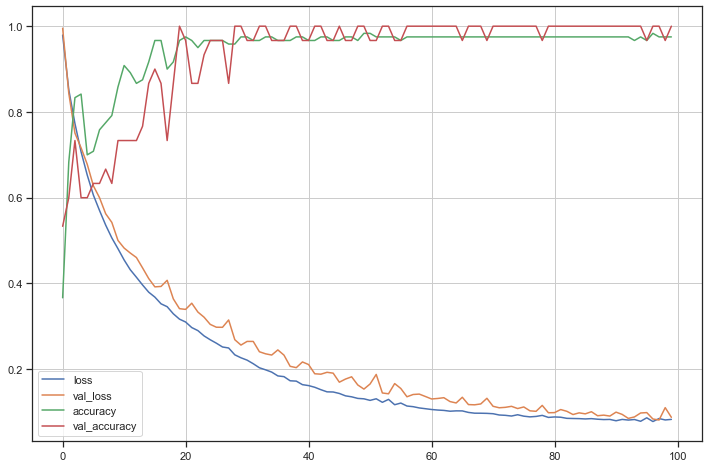

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12, 8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.grid()
plt.show()

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy = {:.2f}'.format(accuracy))

1/1 [==============================] - 0s 13ms/step - loss: 0.0879 - accuracy: 1.0000
Accuracy = 1.00


In [10]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis = 1)
y_pred_class = np.argmax(y_pred, axis = 1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [11]:
test_set = np.array([[5, 2.9, 1, 0.2]])

print("Predicted target name: {}".format(iris['species'].unique()[model.predict_classes(test_set)]))

Predicted target name: ['setosa']


C:\Users\82109\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [12]:
iris.query("species == 'versicolor'")

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [13]:
test_set = np.array([[7, 3.0, 5, 1.4]])

print("Predicted target name: {}".format(iris['species'].unique()[model.predict_classes(test_set)]))

Predicted target name: ['versicolor']


C:\Users\82109\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
